In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [83]:
df= pd.read_csv("Loan Train.csv")

In [84]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Step-1: Data Cleaning

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Removing the irrelevant columns

In [86]:
df=df.drop("Loan_ID",axis=1)

#### Checking the missing Values

In [87]:
df.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


### Replacing Missing Values in columns with mode

In [88]:
df["Gender"] = df["Gender"].fillna(df.Gender.mode()[0])
df["Married"] = df["Married"].fillna(df.Married.mode()[0])
df["Dependents"] = df["Dependents"].fillna(df.Dependents.mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df.Self_Employed.mode()[0])

### Replacing Missing Values in columns accoridng to their probability distribution

In [89]:
# Fit a normal distribution based on the existing non-missing values
mean = df['LoanAmount'].mean()
std_dev = df['LoanAmount'].std()
# Sample values from the normal distribution to replace NaN values
df.loc[df['LoanAmount'].isna(), 'LoanAmount'] = np.random.normal(mean, std_dev, size=df['LoanAmount'].isna().sum())

In [90]:
probabilities = df['Loan_Amount_Term'].value_counts(normalize=True)
# Sample missing values based on the calculated probabilities
df.loc[df['Loan_Amount_Term'].isna(), 'Loan_Amount_Term'] = np.random.choice(probabilities.index,size=df['Loan_Amount_Term'].isna().sum(), p=probabilities.values)

In [91]:
probabilities = df['Credit_History'].value_counts(normalize=True)
# Sample missing values based on the calculated probabilities
df.loc[df['Credit_History'].isna(), 'Credit_History'] = np.random.choice(probabilities.index,size=df['Credit_History'].isna().sum(), p=probabilities.values)

In [92]:
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


### Changing the Dependent column type to int from Object

In [93]:
df["Dependents"] = df["Dependents"].replace("3+",4)
df["Dependents"] = pd.to_numeric(df["Dependents"],errors="coerce")

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 57.7+ KB


## Step-2: Pre-Processing the Data

#### Using Label Encoding for the Categorical Features

In [95]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initializing the LabelEncoder
encoder = LabelEncoder()

categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area','Loan_Status']

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Display the transformed DataFrame
print(df.head())


   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0             5849   
1       1        1           1          0              0             4583   
2       1        1           0          0              1             3000   
3       1        1           0          1              0             2583   
4       1        0           0          0              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  256.216449             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

   Property_Area  Loan_Status  
0              2            1  
1              0            0  
2              2    

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


#### Train-Test Split of data

In [97]:
from sklearn.model_selection import train_test_split

# Define input features (X) and target variable (y)
X = df.drop("Loan_Status",axis=1)
y = df["Loan_Status"]

# Split into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10,stratify=y)


# Print dataset shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (460, 11)
X_test shape: (154, 11)
y_train shape: (460,)
y_test shape: (154,)


## Step-3 Applying the Decision-Tree Model

In [98]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model with default Parameters
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on training data
dt_model.fit(X_train,y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

#### Evaluating the Decision-Tree Model on test data

Decision Tree Accuracy: 0.6948
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.52      0.52        48
           1       0.78      0.77      0.78       106

    accuracy                           0.69       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.70      0.69      0.70       154



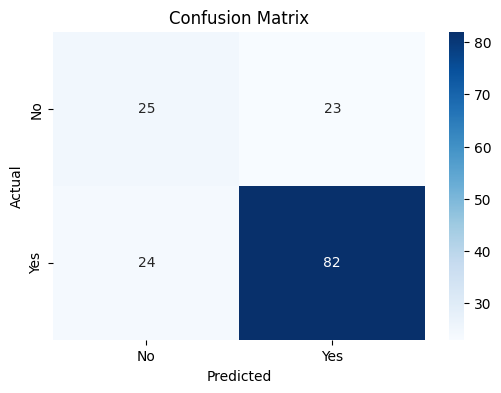

In [99]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Step 4: Pruning & Improving the Decision Tree Model using GridSearch

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,2,3,4,5,6],
    'min_samples_split': [2,5,8,10]
    }

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Define the F0.5-score as a custom scorer
f05_score = make_scorer(fbeta_score, beta=0.5)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring=f05_score,n_jobs=-1)

# Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 8, 10]},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=0.5))

### Get the best parameters and model

In [101]:
# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best parameters:", best_params)

Best parameters: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 2}


### Evaluating our Best Model on test data

Decision Tree Accuracy: 0.7987
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.42      0.56        48
           1       0.79      0.97      0.87       106

    accuracy                           0.80       154
   macro avg       0.83      0.69      0.72       154
weighted avg       0.81      0.80      0.77       154



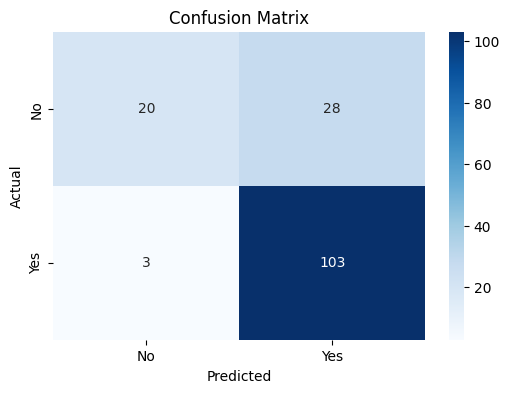

In [102]:
# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Visualization of decision tree using dtreeviz library

In [103]:
!pip install dtreeviz

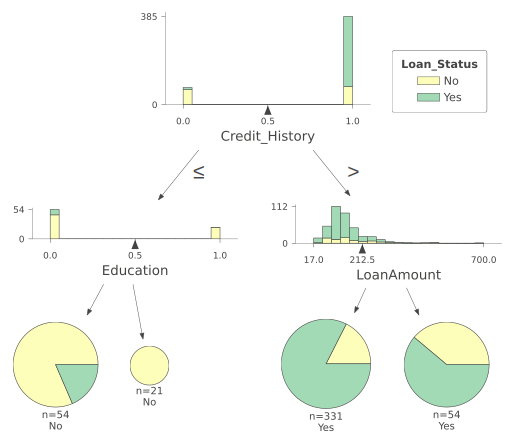

In [104]:
import dtreeviz

# Create the tree visualization
viz_model = dtreeviz.model(best_model,
                           X_train=X_train,
                           y_train=y_train,
                           target_name="Loan_Status",
                           feature_names=X_train.columns,
                           class_names=["No","Yes"])

viz_model.view(scale=1.5)

## Show prediction path of any observation(row) in the dataset

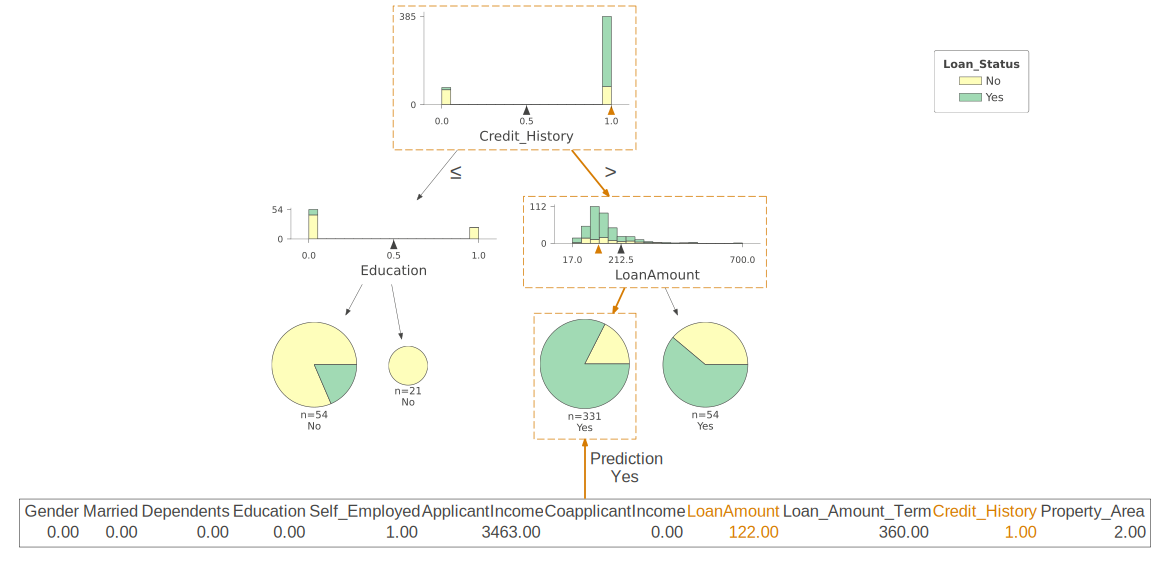

In [105]:
X_row = X.iloc[np.random.randint(0,len(X_train))]

viz_model.view(highlight_path=True, x=X_row,scale=1.5)

## Feature Importances

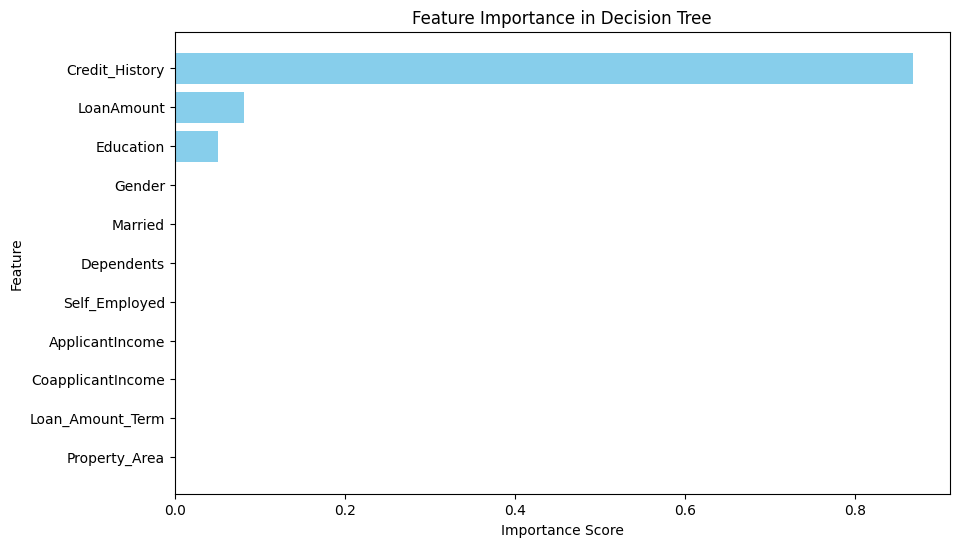

In [106]:
# Get feature importance scores
feature_importance = best_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Decision Tree")
plt.gca().invert_yaxis()  # Invert so most important feature is on top
plt.show()

**Random Forest**

In [107]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest model with default parameters
rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Train the model on training data
rf_clf.fit(X_train, y_train)
params = rf_clf.get_params()
print(params)
y_pred = rf_clf.predict(X_test)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


Random Forest Accuracy: 0.7792
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.42      0.54        48
           1       0.78      0.94      0.85       106

    accuracy                           0.78       154
   macro avg       0.78      0.68      0.70       154
weighted avg       0.78      0.78      0.76       154



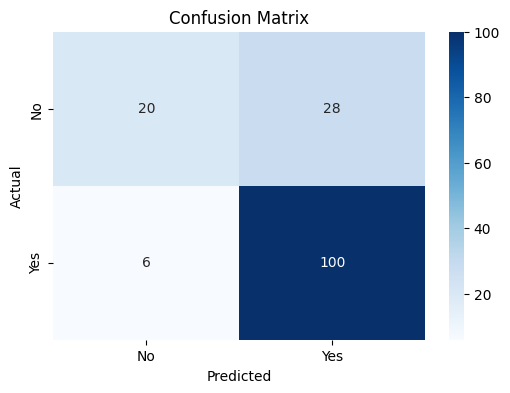

In [108]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Random Forest using grid search**

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [5,10,25],
    'max_depth': [None,1,3,5],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1),
                              param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Train on training data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print("Best Parameters for Random Forest:", best_params_rf)

# Train the final Random Forest model with the best parameters
best_rf_clf = RandomForestClassifier(**best_params_rf, random_state=42, n_jobs=-1)
best_rf_clf.fit(X_train, y_train)


In [ ]:
# Predict on test data
y_pred_rf = best_rf_clf.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy on Test Data: {accuracy_rf:.4f}")

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [ ]:
# Get feature importance scores
feature_importance = best_rf_clf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()  # Invert so most important feature is on top
plt.show()

**Conclusion: In this dataset, we observed that both the Decision Tree and Random Forest models yielded similar results. This is primarily because both models relied heavily on a few key features for splitting—mainly Credit Score and Co-Applicant Income. These variables played a dominant role in decision-making, leading to comparable performance across both models. While Random Forest typically improves stability and reduces overfitting by aggregating multiple trees, in this case, its advantage was minimal due to the strong influence of these two features.**